# Investment Value

In [52]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [53]:
# Set current amount of shares data
shares_data = {'shares':[200,320]}

# Set the tickers
tickers = ['MSFT','AAPL']

# Create the shares DataFrame
shares_df = pd.DataFrame(shares_data,index=tickers)

# Display shares data
shares_df

,shares
MSFT,200
AAPL,320


## Load and Verify Environment Variables

In [54]:
# Load .env environment variables
load_dotenv('../../../../my_env.env')

True

In [55]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [56]:
# Verify that Alpaca key and secret were correctly loaded
print(f'Alpaca Key type: {type(alpaca_api_key)}')
print(f'Alpaca Secret Key type: {type(alpaca_secret_key)}')

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Create the Alpaca API Object

In [57]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Set a variable `today` with current date using ISO format

In [58]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

## Set a variable `timeframe` with value equal to `1Day`

In [59]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = '1Day'

## Create a DataFrame with current price data for `MSFT` & `APPL` using `alpaca.get_bars()`

In [60]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
msft_df = df_portfolio[df_portfolio['symbol']=='MSFT'].drop('symbol',axis=1)
aapl_df = df_portfolio[df_portfolio['symbol']=='AAPL'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
combined_df = pd.concat([msft_df,aapl_df],axis=1,keys=['MSFT','AAPL'])

# Display sample data
combined_df

MSFT                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-07-14 04:00:00+00:00  206.13  208.85  202.03  208.35  37606368   

                                                     AAPL                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-07-14 04:00:00+00:00      449589  206.167465  379.36  389.02  375.51   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  388.23  42751670      475870  383.301034

## Calculate the current value in dollars of the stock portfolio

In [65]:
# Fetch the current closing prices from the DataFrame
msft_close = float(combined_df['MSFT']['close'])
aapl_close = float(combined_df['AAPL']['close'])

In [66]:
# Compute the current value in dollars of the stock portfolio
msft_shares = shares_df.loc['MSFT']['shares']
aapl_shares = shares_df.loc['AAPL']['shares']
msft_value = msft_shares * msft_close
aapl_value = aapl_shares * aapl_close

# Print the current value of the stocks portfolio
print(f'The current value of the {msft_shares} MSFT shares is ${msft_value}')
print(f'The current value of the {aapl_shares} AAPL shares is ${aapl_value}')

The current value of the 200 MSFT shares is $41670.0
The current value of the 320 AAPL shares is $124233.6


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [67]:
# Set the data for the shares value DataFrame
value_data = {'MSFT':[msft_value],'AAPL':[aapl_value]}

# Create a DataFrame with the current value of shares
value_df = pd.DataFrame(value_data)

# Display DataFrame data
value_df

,MSFT,AAPL
0,41670.0,124233.6


<Axes: title={'center': 'Portfolio composition'}, ylabel='shares'>

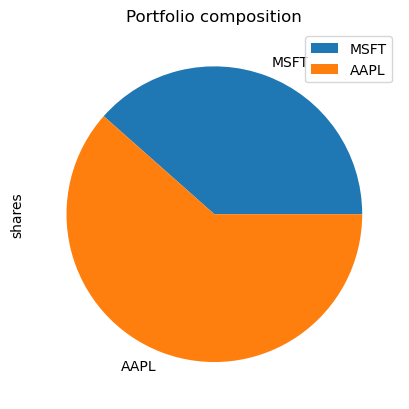

In [68]:
# Create a pie chart to show the proportion of stocks in the portfolio
shares_df.plot.pie(y='shares',title='Portfolio composition')

<Axes: title={'center': 'Current value of portfolio ($)'}>

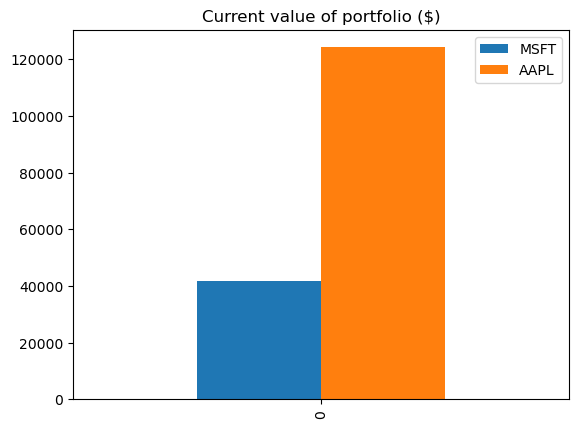

In [69]:
# Create a bar plot to show the value of shares
value_df.plot.bar(title='Current value of portfolio ($)')